<a href="https://colab.research.google.com/github/2021BUSTER/deep_learning_yeji/blob/main/20_%EC%A0%84%EC%9C%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이 학습
: 수만장에 달하는 기존의 이미지에서 학습한 정보를 가져와 내 프로젝트에 활용하는 것

- 데이터 양이 충분하지 않을 때 사용

> 지도학습 : 정답을 알려주고 시작  
> 비지도학습 : 정답을 알려주지 않고 시작


* 데이터 수 늘리기 : ImageDataGenerator()  
 -- 주어진 데이터를 ㅣ용해 변형된 이미지를 만들어 학습셋에 포함시킴 (이미지 데이터 수 확장)
 > rescale : 주어진 이미지의 크기 바꾸기 (정규화 ex) 0 ~ 255 -> 0 ~ 1)  
 > horiaontal_filp, vertival_filp : w주어진 이미지를 수평 or 수직으로 뒤집기  
 > zoom_range : 정해진 범위 안에서 축소 or 확대  
 > width_shift, height_shift : 정해진 범위 안에서 그림을 수평 or 수직으로 랜덤하게 평행이동
 > rotation_range : 정해진 각도만큼 이미지 회전   
 > shear_range : 좌표 하나를 고정시키고 다른 몇 개의 좌표를 이동시키는 변환  
 > fill_mode : 이미지를 축소  or 회전 할 때 생기는 빈 공간을 어떻게 채울지 결정 (nearest : 가장 비슷한 색으로 채움)

* 폴더에 저장된 데이터 불러오기 : flow_from_directory() 



In [2]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

# colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다.
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 6s 180ms/step - loss: 0.7085 - accuracy: 0.4749 - val_loss: 0.6913 - val_accuracy: 0.5200
Epoch 2/50
30/30 [==============================] - 5s 173ms/step - loss: 0.6891 - accuracy: 0.6412 - val_loss: 0.6947 - val_accuracy: 0.4000
Epoch 3/50
30/30 [==============================] - 5s 175ms/step - loss: 0.6915 - accuracy: 0.5437 - val_loss: 0.6865 - val_accuracy: 0.7800
Epoch 4/50
30/30 [==============================] - 5s 175ms/step - loss: 0.6840 - accuracy: 0.6716 - val_loss: 0.6762 - val_accuracy: 0.7600
Epoch 5/50
30/30 [==============================] - 5s 173ms/step - loss: 0.6788 - accuracy: 0.6512 - val_loss: 0.6325 - val_accuracy: 0.6000
Epoch 6/50
30/30 [==============================] - 5s 172ms/step - loss: 0.6821 - accuracy: 0.5790 - val_loss: 0.6417 - val_accuracy: 0.6000
Epoch 7/50
30/30 [==============================] - 5s 174ms/step - loss: 0.6589 - accuracy: 0.6181 - val_loss: 0.6849 - val_accuracy: 0.4600
Epoch 

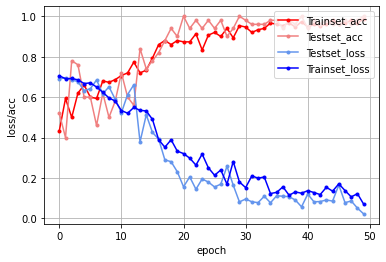

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       'train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행합니다
history = model.fit_generator(
       train_generator,
       steps_per_epoch=30,  #적절한 값으로 조절합니다.
       epochs=50,   #적절한 값으로 조절합니다.
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()


# 전위학습 실습
: 기존의 학습 결과를 가져와서 유사한 프로젝트에 사용하는 방법
* 관련없는 수만장의 이미지셋 학습 정보가 큰역할을 하는 이유는 '형태'를 구분하는 기본적인 학습이 되어 있기 때문임.  
 -- 어떤 픽셀의 조합이 선이고, 면인지 파악이 되어있음.  
  

 ### 전위학습 방법
> 1. 대규모 데이터 셋에서 학습된 기존의 네트워크를 불러옴.
> 3. cnn모델의 앞쪽을 이 네트웨크로 채움.
> 2. 두 네트워크가 잘 맞물리게끔 미세조정(fine tuning)을 함



In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

np.random.seed(3)
tf.compat.v1.set_random_seed(3)

In [6]:
# 데이터 늘리기
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

# 실제 데이터가 있는 곳을 알려주고 이미지 불러오기
train_generator = train_datagen.flow_from_directory(
       'train',                  # 이미지가 위치한 폴더
       target_size=(150, 150),   # 이미지 크기
       batch_size=5,             
       class_mode='binary')     

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       'test',                  # 테스트셋이 있는 폴더 위치
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [7]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))    # include_top : VGG16의 마지막 층 (분류를 담당하는 곳)을 불러올지 말지 정함 , 로켈 네트워크로 연결할 것임으로 False로 설정.
transfer_model.trainable = False
transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

history = finetune_model.fit_generator(   
       train_generator,                 # 앞서 만들어진 train_generator를 학습 모델로 사용
       steps_per_epoch=100,             # 이미지 생성기에서 몇 개의 샘플을 뽑을지 결정
       epochs=20,
       validation_data=test_generator,
       validation_steps=4)

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 41s 391ms/step - loss: 0.6842 - accuracy: 0.5824 - val_loss: 0.4166 - val_accuracy: 0.9500


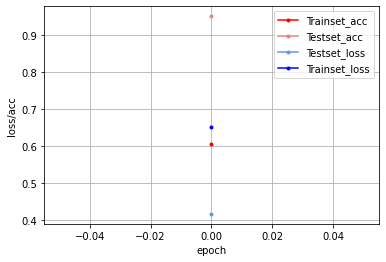

In [8]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
